# **Construindo uma distribuição de frequência com base em um conjunto de dados**

O conjunto de dados a seguir lista os preços (em dólares) de 30 aparelhos
GPS (global positioning system) portáteis.
Construa uma distribuição de frequência com sete classes.

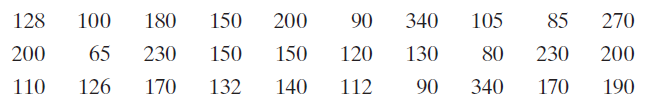

In [1]:
import pandas as pd
# Conjunto de dados
data = pd.Series([128, 100, 180, 150, 200, 90, 340, 105, 85, 270,
                  200, 65, 230, 150, 150, 120, 130, 80, 230, 200,
                  110, 126, 170, 132, 140, 112, 90, 340, 170, 190])
print(data)
# Valores máximo, mínimo e número de classes
v_max = data.max()
v_min = data.min()
n_classes = 7

0     128
1     100
2     180
3     150
4     200
5      90
6     340
7     105
8      85
9     270
10    200
11     65
12    230
13    150
14    150
15    120
16    130
17     80
18    230
19    200
20    110
21    126
22    170
23    132
24    140
25    112
26     90
27    340
28    170
29    190
dtype: int64


# **Distribuição de Frequências**

O método value_counts registra a frequência de ocorrência dos dados em cada classe (o número de classes é dado pelo parâmetro bins). O método sort_index ordena os índices (classes) em ordem crescente.

In [2]:
dist_freq = data.value_counts(bins=7).sort_index()
print(dist_freq)

(64.72399999999999, 104.286]    6
(104.286, 143.571]              9
(143.571, 182.857]              6
(182.857, 222.143]              4
(222.143, 261.429]              2
(261.429, 300.714]              1
(300.714, 340.0]                2
dtype: int64


Note que as classes da distribuição de frequências não estão definidas de forma "amigável". Vamos alterar a definição dos intervalos de classe usando o método interval_range.

In [3]:
# Reconfiguração do conjunto de dados: Series para DataFrame
nova_dist_freq = pd.DataFrame(dist_freq)
nova_dist_freq = nova_dist_freq.reset_index()
nova_dist_freq.columns = ['Classe', 'Frequência']
# Cálculo da amplitude de classe, com respectivos intervalos de classe
amplitude = round((v_max-v_min)/n_classes)
intervalos = pd.interval_range(start=v_min, end=v_max, freq=amplitude)
print(intervalos)
# Atribuição dos intervalos para a coluna Classe
nova_dist_freq['Classe'] = intervalos
nova_dist_freq

IntervalIndex([(65, 104], (104, 143], (143, 182], (182, 221], (221, 260], (260, 299], (299, 338]], dtype='interval[int64, right]')


,Classe,Frequência
0,"(65, 104]",6
1,"(104, 143]",9
2,"(143, 182]",6
3,"(182, 221]",4
4,"(221, 260]",2
5,"(260, 299]",1
6,"(299, 338]",2


# **Caracterísiticas adicionais da distribuição**

Vamos adicionar as colunas que exibam os pontos médios, a frequência relativa e a frequência acumnulada de cada classe.

In [4]:
# Cálculo dos pontos médios das classe
pts_medios = [inter.mid for inter in intervalos]
print(pts_medios)
# Inserção da coluna Pontos médios
nova_dist_freq['Pontos médios'] = pts_medios
# Cálculo e inserção das colunas de frequência relativa e acumulada
observacoes = len(data)
nova_dist_freq['Frequência relativa'] = nova_dist_freq['Frequência']/observacoes
nova_dist_freq['Frequência acumulada'] = nova_dist_freq['Frequência'].cumsum()
nova_dist_freq

[84.5, 123.5, 162.5, 201.5, 240.5, 279.5, 318.5]


,Classe,Frequência,Pontos médios,Frequência relativa,Frequência acumulada
0,"(65, 104]",6,84.5,0.200000,6
1,"(104, 143]",9,123.5,0.300000,15
2,"(143, 182]",6,162.5,0.200000,21
3,"(182, 221]",4,201.5,0.133333,25
4,"(221, 260]",2,240.5,0.066667,27
5,"(260, 299]",1,279.5,0.033333,28
6,"(299, 338]",2,318.5,0.066667,30


# **Construção do histograma de frequências**

O histograma é construído usando o método hist do Pandas. Diversas características do histograma, tais como as classes (parâmetro bins), cor das barras e marcações nos eixos vertical e horizontal são programáveis. Também é inserida a frequência observada no topo de cada barra.

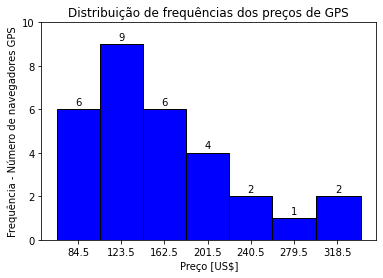

In [5]:
# Construção do histograma
histograma = data.hist(bins=[inter.left for inter in intervalos]+[v_max],
                       color='blue', edgecolor='black', grid=False)
# Inserção de atributos ao gráfico
histograma.set(xlabel='Preço [US$]', ylabel='Frequência - Número de navegadores GPS',
               title = 'Distribuição de frequências dos preços de GPS',
               xticks = nova_dist_freq['Pontos médios'],
               yticks = range(0,nova_dist_freq['Frequência'].max()+2,2))
# Inserção de rótulos nas barras do histograma
barras = histograma.patches
freqs = nova_dist_freq['Frequência']
for barra, freq in zip(barras, freqs):
    altura = barra.get_height()
    histograma.text(barra.get_x()+barra.get_width()/2, altura+0.1,
                    freq, ha='center', va='bottom')

# **Construção do polígono de frequências**

Para construir o polígono de frequências, vamos empregar a biblioteca matplotlib.

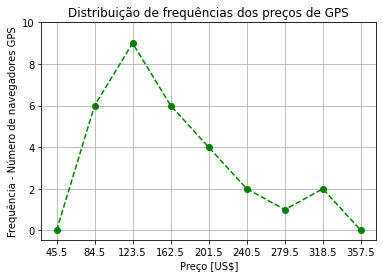

In [6]:
import matplotlib.pyplot as plt
# Construção dos dados com inserção dos pontos médios fictícios
fic_esq = [pts_medios[0]-amplitude]
fic_dir = [pts_medios[-1]+amplitude]
x_data = fic_esq + list(nova_dist_freq['Pontos médios']) + fic_dir
y_data = [0] + list(nova_dist_freq['Frequência']) + [0]
# Plotagem do polígono de frequências, com diversos atributos
plt.plot(x_data, y_data,'go--')
plt.xlabel('Preço [US$]')
plt.ylabel('Frequência - Número de navegadores GPS')
plt.title('Distribuição de frequências dos preços de GPS')
plt.xticks(x_data)
plt.yticks(range(0,nova_dist_freq['Frequência'].max()+2,2))
plt.grid()